In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"herutriana","key":"b448feb49f2d4ee6465bf0befed121ed"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ckay16/accident-detection-from-cctv-footage

 93% 233M/249M [00:01<00:00, 159MB/s]
100% 249M/249M [00:01<00:00, 149MB/s]


In [ ]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile,os
zip_lcl = '/content/accident-detection-from-cctv-footage.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/tmp')
rzip.close()

dirbase = '/tmp/data'
dir_latih = os.path.join(dirbase, 'train')
dir_valid = os.path.join(dirbase, 'val')
dir_test = os.path.join(dirbase,'test')
accident_test = os.path.join(dir_test,'Accident')
nonaccident_test = os.path.join(dir_test,'Non Accident')

In [ ]:
os.listdir('/tmp/data/train')

['Non Accident', 'Accident']

In [ ]:
os.listdir('/tmp/data/val')

['Non Accident', 'Accident']

In [ ]:
data_latih = ImageDataGenerator(
    rescale=1./255,    
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0)
data_valid = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.9,
    shear_range=0)

In [ ]:
generator_latih = data_latih.flow_from_directory(
    directory=dir_latih,
    target_size=(150,150),
    batch_size=100,
    subset='training',
    class_mode='binary')
generator_valid = data_valid.flow_from_directory(
    directory=dir_valid,
    target_size=(150,150),
    batch_size=100,
    subset='validation',
    class_mode='binary')

Found 791 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


In [ ]:
model = tensor.keras.models.Sequential([
  tensor.keras.layers.BatchNormalization(),
  tensor.keras.layers.Conv2D(32,3,activation='relu',input_shape=(150,150,3)),
  tensor.keras.layers.MaxPooling2D(),
  tensor.keras.layers.Conv2D(64,3,activation='relu',kernel_regularizer='l2'),
  tensor.keras.layers.MaxPooling2D(),
  tensor.keras.layers.Conv2D(128,3,activation='relu',kernel_regularizer='l2'),
  tensor.keras.layers.MaxPooling2D(),
  tensor.keras.layers.Flatten(),
  tensor.keras.layers.Dense(256, activation='relu',kernel_regularizer='l2'),
  tensor.keras.layers.Dense(2, activation='softmax')
  ])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tensor.optimizers.Adam(),
              metrics=['accuracy'])

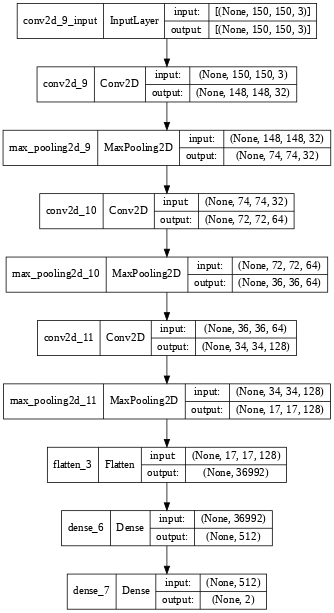

In [ ]:
model_viz = tensor.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=2,save_best_only=True)

In [ ]:
class myCallback(tensor.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.97):
      print("\nAkurasi di atas 97%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(
    generator_latih,
    #steps_per_epoch=25, # 634 images = batch_size * steps
    epochs=150,
    validation_data=generator_valid,
    #validation_steps=6, # 96 images = batch_size * steps
    verbose=2,
    callbacks=[callbacks])

Epoch 1/150
8/8 - 52s - loss: 2.2329 - accuracy: 0.6410 - val_loss: 2.1779 - val_accuracy: 0.5172 - 52s/epoch - 6s/step
Epoch 2/150
8/8 - 52s - loss: 2.0678 - accuracy: 0.6283 - val_loss: 2.0455 - val_accuracy: 0.4713 - 52s/epoch - 6s/step
Epoch 3/150
8/8 - 52s - loss: 1.9264 - accuracy: 0.6321 - val_loss: 1.9147 - val_accuracy: 0.4713 - 52s/epoch - 6s/step
Epoch 4/150
8/8 - 52s - loss: 1.8126 - accuracy: 0.6182 - val_loss: 1.7971 - val_accuracy: 0.5632 - 52s/epoch - 6s/step
Epoch 5/150
8/8 - 52s - loss: 1.6946 - accuracy: 0.6738 - val_loss: 1.7113 - val_accuracy: 0.5287 - 52s/epoch - 7s/step
Epoch 6/150
8/8 - 52s - loss: 1.6230 - accuracy: 0.6637 - val_loss: 1.6611 - val_accuracy: 0.4828 - 52s/epoch - 6s/step
Epoch 7/150
8/8 - 52s - loss: 1.5417 - accuracy: 0.6675 - val_loss: 1.5803 - val_accuracy: 0.4713 - 52s/epoch - 6s/step
Epoch 8/150
8/8 - 55s - loss: 1.4786 - accuracy: 0.6751 - val_loss: 1.5476 - val_accuracy: 0.4828 - 55s/epoch - 7s/step
Epoch 9/150
8/8 - 52s - loss: 1.4210 - a

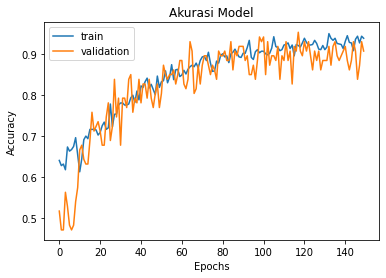

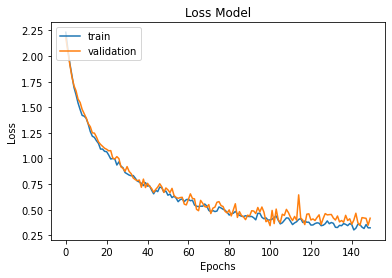

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = os.listdir(accident_test)
path = []
for fn in uploaded:
  # Predicting images accident
  path.append(fn)

for obj in path:
  patoh = os.path.join(accident_test,obj)
  img = image.load_img(patoh, target_size=(300, 300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=30)

  print(obj)
  if classes==0:
    print('accident')
  else:
    print('non-accident')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('accident')
  else:
    print('non-accident')

NameError: ignored

In [ ]:
# Convert the model.
converter = tensor.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('accident_classification.tflite', 'wb') as f:
  f.write(tflite_model)

model.save('accident_classification.pb')
!cd

INFO:tensorflow:Assets written to: /tmp/tmpy1by21bp/assets


INFO:tensorflow:Assets written to: accident_classification.pb/assets


INFO:tensorflow:Assets written to: accident_classification.pb/assets
